### Excersise 6

In [1]:
#a) To demonstrate Term Frequency – Inverse Document Frequency (TF – IDF) using python
import pandas as pd
import numpy as np

corpus = ['data science is one of the most important fields of science',
          'this is one of the best data science courses',
          'data scientists analyze data']
words_set = set()

for doc in corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

n_docs = len(corpus)  # Number of documents in the corpus
n_words_set = len(words_set)  # Number of unique words in the corpus
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ')  # Words in the document
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))

idf = {}
for w in words_set:
    k = 0  # number of documents in the corpus that contain this word
    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1
    idf[w] = np.log10(n_docs / k)

df_tf_idf = df_tf.copy()
for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]

print(df_tf_idf.sort_index(axis=1))


   analyze      best   courses  data    fields  important        is      most  \
0  0.00000  0.000000  0.000000   0.0  0.043375   0.043375  0.016008  0.043375   
1  0.00000  0.053013  0.053013   0.0  0.000000   0.000000  0.019566  0.000000   
2  0.11928  0.000000  0.000000   0.0  0.000000   0.000000  0.000000  0.000000   

         of       one   science  scientists       the      this  
0  0.032017  0.016008  0.032017     0.00000  0.016008  0.000000  
1  0.019566  0.019566  0.019566     0.00000  0.019566  0.053013  
2  0.000000  0.000000  0.000000     0.11928  0.000000  0.000000  


In [2]:
# b) To demonstrate word embeddings using word2vec

[[-5.3622725e-04  2.3643136e-04  5.1033497e-03 ... -7.0415605e-03
   9.0145587e-04  6.3925339e-03]
 [-8.6196875e-03  3.6657380e-03  5.1898835e-03 ... -2.3915148e-03
  -9.5100943e-03  4.5058788e-03]
 [ 9.4563962e-05  3.0773198e-03 -6.8126451e-03 ...  5.1259040e-04
   8.2130842e-03 -7.0190406e-03]
 ...
 [ 9.7702928e-03  8.1651136e-03  1.2809718e-03 ... -2.9727400e-03
  -4.9318983e-03 -2.3151112e-03]
 [-1.9442164e-03 -5.2675214e-03  9.4471136e-03 ...  5.9827138e-03
   6.8153618e-03  7.8225443e-03]
 [-9.5001198e-03  9.5622232e-03 -7.7707553e-03 ... -3.1351077e-03
  -6.3388194e-03  9.8700775e-03]]
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']


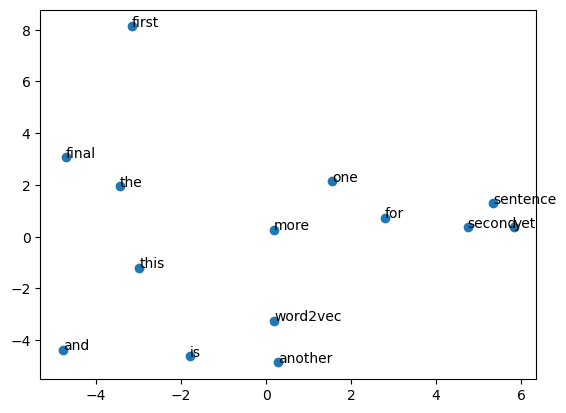

In [3]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2d PCA model to the vectors
X = model.wv.vectors
word_vectors_norm = StandardScaler().fit_transform(X)
print(X)

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors_norm)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
print(words)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [4]:
from gensim.models import Word2Vec

#define a sample corpus
corpus = [
    ['apple', 'banana', 'orange', 'grape', 'pear'],
    ['car', 'truck', 'bus', 'bike'],
    ['happy', 'sad', 'angry', 'excited'],
    ['cat', 'dog', 'bird', 'fish']
]

#train a Word2Vec model on the corpus
model = Word2Vec(corpus, vector_size=10, window=15, min_count=1, workers=2)

#check the similarity between similar words
print(model.wv.similarity('apple', 'banana'))
print(model.wv.similarity('bus', 'truck'))
print(model.wv.similarity('happy', 'angry'))
print(model.wv.similarity('cat', 'dog'))


-0.61994904
0.23240039
-0.09835175
0.7049778


### Excersise 7

In [5]:
import nltk
nltk.download('punkt')
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob
training_corpus = [
 ('I am exhausted of this work.', 'Class_B'),
 ("I can't cooperate with this", 'Class_B'),
 ('He is my badest enemy!', 'Class_B'),
 ('My management is poor.', 'Class_B'),
 ('I love this burger.', 'Class_A'),
 ('This is an brilliant place!', 'Class_A'),
 ('I feel very good about these dates.', 'Class_A'),
 ('This is my best work.', 'Class_A'),
 ("What an awesome view", 'Class_A'),
 ('I do not like this dish', 'Class_B')]
test_corpus = [
 ("I am not feeling well today.", 'Class_B'),
 ("I feel brilliant!", 'Class_A'),
 ('Gary is a friend of mine.', 'Class_A'),
 ("I can't believe I'm doing this.", 'Class_B'),
 ('The date was good.', 'Class_A'), ('I do not enjoy my job', 'Class_B')]
model = NBC(training_corpus)
print(model.classify("Their codes are amazing."))
print(model.classify("I don't like their computer."))
print(model.accuracy(test_corpus))

Class_A
Class_B
0.8333333333333334


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akanksh_02\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Excersise 8

In [6]:
#To apply support vector machine for text classification

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm

training_corpus = [
    ('I am exhausted of this work.', 'Class_B'),
    ("I can't cooperate with this", 'Class_B'),
    ('He is my badest enemy!', 'Class_B'),
    ('My management is poor.', 'Class_B'),
    ('I love this burger.', 'Class_A'),
    ('This is an brilliant place!', 'Class_A'),
    ('I feel very good about these dates.', 'Class_A'),
    ('This is my best work.', 'Class_A'),
    ("What an awesome view", 'Class_A'),
    ('I do not like this dish', 'Class_B')
]

test_corpus = [
    ("I am not feeling well today.", 'Class_B'),
    ("I feel brilliant!", 'Class_A'),
    ('Gary is a friend of mine.', 'Class_A'),
    ("I can't believe I'm doing this.", 'Class_B'),
    ('The date was good.', 'Class_A'),
    ('I do not enjoy my job', 'Class_B')
]

# preparing data for SVM model (using the same training_corpus, test_corpus from naive bayes example)
train_data = []
train_labels = []
for row in training_corpus:
    train_data.append(row[0])
    train_labels.append(row[1])

test_data = []
test_labels = []
for row in test_corpus:
    test_data.append(row[0])
    test_labels.append(row[1])

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)

# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)

# Apply model on test data
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear
model = svm.SVC(kernel='linear')
model.fit(train_vectors, train_labels)

prediction = model.predict(test_vectors)

print(prediction)
print(classification_report(test_labels, prediction))


['Class_A' 'Class_A' 'Class_B' 'Class_B' 'Class_A' 'Class_A']
              precision    recall  f1-score   support

     Class_A       0.50      0.67      0.57         3
     Class_B       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



### Excersise 9

In [8]:
#To convert text to vectors (using term frequency) and apply cosine similarity to provide closeness among two texts.

In [9]:
import math
from collections import Counter

def get_cosine(vec1, vec2):
    print(vec1.keys())
    print(vec2.keys())
    common = set(vec1.keys()) & set(vec2.keys())
    print(common)
    numerator = sum([vec1[x] * vec2[x] for x in common])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = text.split()
    return Counter(words)

text1 = 'This is an article on analytics vidhya'
text2 = 'article on analytics vidhya is about natural language processing'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

print(vector1)
print(vector2)

cosine = get_cosine(vector1, vector2)
print(cosine)


Counter({'This': 1, 'is': 1, 'an': 1, 'article': 1, 'on': 1, 'analytics': 1, 'vidhya': 1})
Counter({'article': 1, 'on': 1, 'analytics': 1, 'vidhya': 1, 'is': 1, 'about': 1, 'natural': 1, 'language': 1, 'processing': 1})
dict_keys(['This', 'is', 'an', 'article', 'on', 'analytics', 'vidhya'])
dict_keys(['article', 'on', 'analytics', 'vidhya', 'is', 'about', 'natural', 'language', 'processing'])
{'is', 'vidhya', 'article', 'on', 'analytics'}
0.629940788348712
